In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
parking = pd.read_excel('data/parking.xls')
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [3]:
parking.describe()

,Total Parking Spaces
count,9060.000000
mean,51.708499
std,187.107773
min,0.000000
25%,0.000000
50%,8.000000
75%,40.000000
max,6198.000000


In [4]:
parking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9060 entries, 0 to 9059
Data columns (total 6 columns):
Bldg City               9060 non-null object
Bldg State              9060 non-null object
Bldg Status             9060 non-null object
Property Type           9060 non-null object
Total Parking Spaces    9060 non-null int64
Owned/Leased            9060 non-null object
dtypes: int64(1), object(5)
memory usage: 424.8+ KB


In [5]:
parking['Bldg Status'].unique()

array(['ACTIVE', 'DECOMMISSIONED', 'EXCESS'], dtype=object)

In [6]:
Bldg_status = parking['Bldg Status'].value_counts()
Bldg_status

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

In [7]:
# parking['Total Parking Spaces'].value_counts()

In [8]:
# sns.scatterplot(x = Bldg_status.index, y = Bldg_status.values)
# plt.show()

In [9]:
parking['Bldg State'].unique()

array(['CT', 'MA', 'ME', 'NH', 'RI', 'VT', 'ID', 'OR', 'WA', 'DC', 'MD',
       'VA', 'NJ', 'NY', 'DE', 'PA', 'WV', 'AL', 'FL', 'GA', 'KY', 'MS',
       'NC', 'SC', 'TN', 'IL', 'IN', 'MI', 'MN', 'OH', 'WI', 'IA', 'KS',
       'MO', 'NE', 'AR', 'LA', 'NM', 'OK', 'TX', 'CO', 'MT', 'ND', 'SD',
       'UT', 'WY', 'AZ', 'CA', 'NV'], dtype=object)

In [10]:
parking.columns

Index(['Bldg City', 'Bldg State', 'Bldg Status', 'Property Type',
       'Total Parking Spaces', 'Owned/Leased'],
      dtype='object')

### 1. What is the Distribution & values for Owned/Leased 

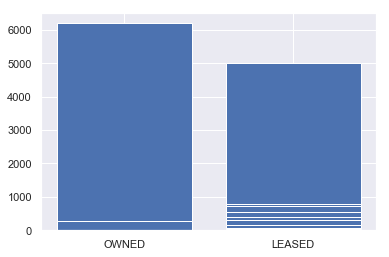

In [11]:
plt.bar(parking['Owned/Leased'], parking['Total Parking Spaces'])
plt.show()

#### This is taking much more time therefore we will convert in to pd_pivot_table for faster execution

In [12]:
owned_leased = pd.pivot_table(parking, index = 'Owned/Leased', values = 'Total Parking Spaces', aggfunc = 'count')
owned_leased

,Total Parking Spaces
Owned/Leased,
LEASED,6940
OWNED,2120


##### Displaying

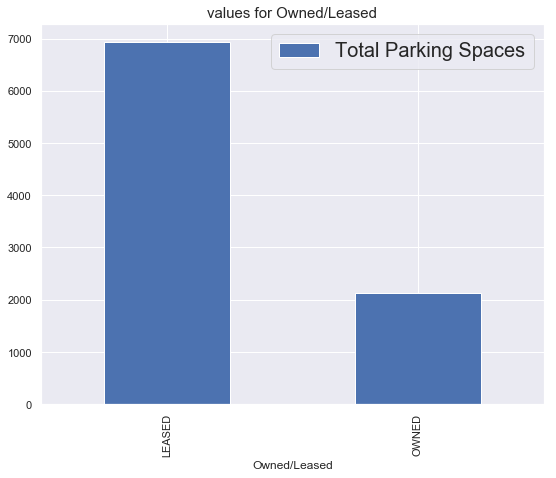

In [49]:
owned_leased.plot(kind='bar')
plt.title('values for Owned/Leased', fontsize =15)
plt.show()

### 2. In which Bldg State parking situation is in 'Excess', put in order.

In [14]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [15]:
# parking['Bldg State'[parking['Bldg Status'] == 'EXCESS']]

parking[parking['Bldg Status'] == 'EXCESS'].head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
1809,MONTCLAIR,NJ,EXCESS,BUILDING,29,OWNED
1881,BUFFALO,NY,EXCESS,BUILDING,0,OWNED
1925,BINGHAMTON,NY,EXCESS,BUILDING,0,OWNED
1926,BINGHAMTON,NY,EXCESS,BUILDING,0,OWNED
1927,BINGHAMTON,NY,EXCESS,BUILDING,0,OWNED


In [16]:
parking['Bldg Status'].unique()

array(['ACTIVE', 'DECOMMISSIONED', 'EXCESS'], dtype=object)

##### This is will take much more time again so we will convert in to pd_pivot_table for faster execution

In [17]:
excess_parking = pd.pivot_table(parking, index = 'Bldg State', columns = 'Bldg Status', values= 'Total Parking Spaces')
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
AR,37.000000,NaN,NaN
AZ,32.256757,NaN,NaN
CA,60.493298,NaN,NaN
CO,78.936709,NaN,22.200000
CT,29.327586,NaN,NaN
DC,41.255144,NaN,NaN
DE,15.750000,NaN,NaN
FL,51.905569,NaN,NaN


##### Since We're interested only in the 'Excess' column we will remove the 'NaN' values.
##### In the above we took, 
- 'Bldg State' on the Index that's why we set it to the (index) parameter,
- 'Bldg Status' on the (columns)
- 'Total parking spaces' for their values

In [18]:
excess_parking = excess_parking[excess_parking['EXCESS'] > 0 ]
excess_parking
# we filter all the values of 'Excess' column which are greater than 0

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
CO,78.936709,NaN,22.200000
IL,45.000000,NaN,21.000000
LA,43.684932,NaN,68.666667
MD,104.185090,0.000000,43.166667
MO,121.200000,815.333333,254.272727
NE,54.060000,NaN,19.000000
NJ,32.169118,NaN,4.300000
NV,48.648649,NaN,173.000000


In [19]:
excess_parking.index

Index(['AL', 'CO', 'IL', 'LA', 'MD', 'MO', 'NE', 'NJ', 'NV', 'OK', 'WI'], dtype='object', name='Bldg State')

##### Plotting The result.

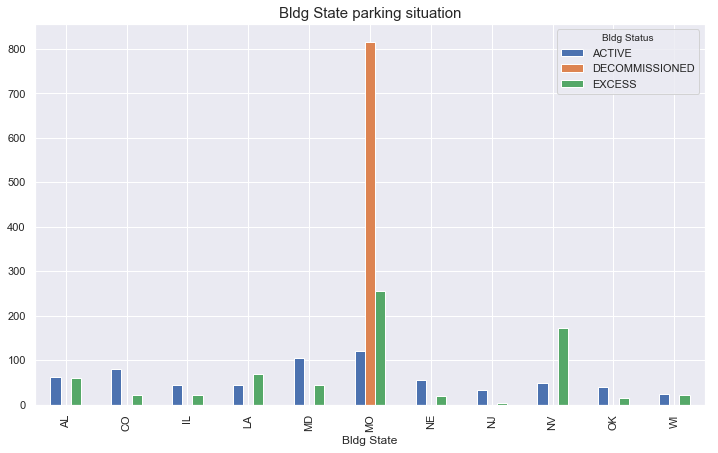

In [20]:
# plt.figure(figsize=(12,10))

sns.set_context({'figure.figsize' : (12, 7)})
sns.set_style('darkgrid')

# plt.plot(kind = 'bar', x = excess_parking.index, y = excess_parking.values )

excess_parking.plot(kind='bar')
plt.title('Bldg State parking situation', fontsize =15)

# # rcParams['figure.figsize'] = 11.7,8.27
plt.show()

##### Now Sorting the EXCESS data

In [21]:
sorted_EXCESS = excess_parking['EXCESS'].sort_values(ascending = False)
index_EXCESS = sorted_EXCESS.index

<BarContainer object of 11 artists>

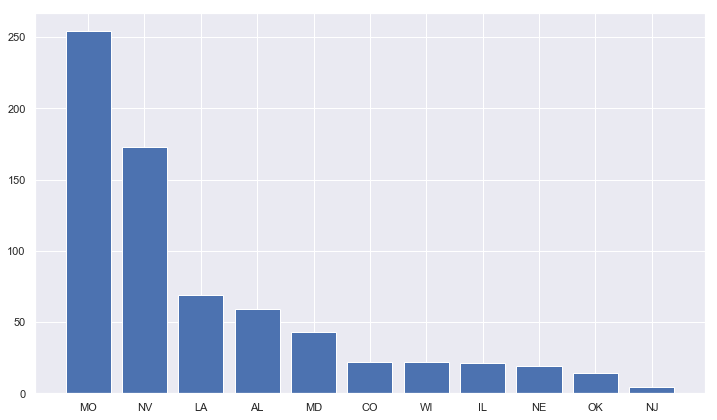

In [22]:
plt.bar(index_EXCESS, sorted_EXCESS)

##### So by our calculations 'MO' state has the highest 'EXCESS' values.

### 3. The Building Cities that have been 'Decommisioned' along with 'Total Parking'.

In [23]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [24]:
parking[parking['Bldg Status'] == 'DECOMMISSIONED']

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
429,PORTHILL,ID,DECOMMISSIONED,BUILDING,0,OWNED
1933,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
1934,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
2338,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
2348,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED
5726,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,0,OWNED
6752,FORT WORTH,TX,DECOMMISSIONED,BUILDING,0,OWNED


##### Filtering all the values above 0 

In [25]:
decommissioned_cities = pd.pivot_table(parking, index = 'Bldg City', columns = 'Bldg Status', values = 'Total Parking Spaces')
decommissioned_cities = decommissioned_cities[decommissioned_cities['DECOMMISSIONED'] > 0]
decommissioned_cities

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg City,,,
OVERLAND,21.666667,2089.0,NaN
SAINT LOUIS,135.977273,178.5,NaN


##### Plotting

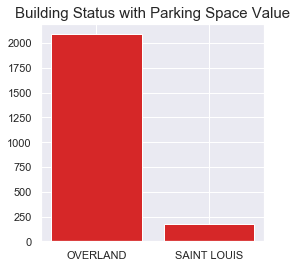

In [26]:
sns.set_context({'figure.figsize' : (4, 4)})
sns.set_style('darkgrid')
plt.bar(decommissioned_cities.index, decommissioned_cities['DECOMMISSIONED'], color = 'tab:red')
plt.title('Building Status with Parking Space Value',  fontsize =15)
plt.show()

### 4. In which type of Property Parking space is in 'Excess'.

In [27]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [28]:
parking['Bldg Status'].unique()

array(['ACTIVE', 'DECOMMISSIONED', 'EXCESS'], dtype=object)

In [29]:
parking['Property Type'].unique()

array(['BUILDING', 'STRUCTURE', 'LAND'], dtype=object)

In [30]:
property_Excess_rows = parking[parking['Bldg Status'] == 'EXCESS']
property_Excess_rows.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
1809,MONTCLAIR,NJ,EXCESS,BUILDING,29,OWNED
1881,BUFFALO,NY,EXCESS,BUILDING,0,OWNED
1925,BINGHAMTON,NY,EXCESS,BUILDING,0,OWNED
1926,BINGHAMTON,NY,EXCESS,BUILDING,0,OWNED
1927,BINGHAMTON,NY,EXCESS,BUILDING,0,OWNED


In [31]:
property_type_excess = pd.pivot_table(property_Excess_rows, index = 'Property Type', values='Total Parking Spaces')
property_type_excess

,Total Parking Spaces
Property Type,
BUILDING,57.791045
STRUCTURE,37.000000


##### Plotting

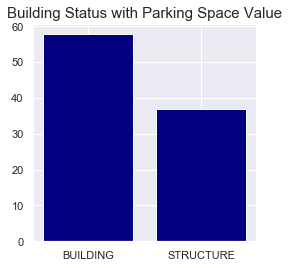

In [32]:
sns.set_context({'figure.figsize' : (4, 4)})
# sns.set_style('darkgrid')
plt.bar(property_type_excess.index, property_type_excess['Total Parking Spaces'], color = 'navy')
plt.title('Building Status with Parking Space Value',  fontsize =15)
plt.show()

### 5. Where 'Bldg Status' is more 'ACTIVE' Parking. Columns : Owned/Leased

In [33]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [34]:
bldg_active = parking[parking['Bldg Status'] == 'ACTIVE' ]
bldg_active.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [35]:
own_leas_space = pd.pivot_table(bldg_active, index = 'Owned/Leased', values='Total Parking Spaces')
own_leas_space

,Total Parking Spaces
Owned/Leased,
LEASED,44.707349
OWNED,74.365997


##### By the above Calculation, On average, 'Owned' section has more 'Parking Space' then 'Leased'. Average because the 'pd.pivot'  we're using 'aggfunc='mean'' , if we want some other rule just replace it.

#### Now calculating the Percentage of above.

In [36]:
own_leas_space['Proportions'] = np.round((own_leas_space / own_leas_space.sum()) * 100, 1)
own_leas_space

,Total Parking Spaces,Proportions
Owned/Leased,,
LEASED,44.707349,37.5
OWNED,74.365997,62.5


##### Visualizing Proportions by Pie Chart

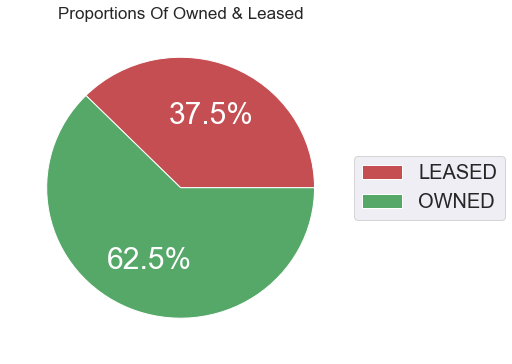

In [50]:
plt.figure(figsize=(6, 6))
plt.pie(own_leas_space['Proportions'],
        autopct = '%1.1f%%',
        colors = ('r', 'g', 'orange'),
        textprops=dict(color="w"),
       )
params = {'font.size': 30,
          'legend.fontsize': 20,
          'legend.handlelength': 2
         }
plt.rcParams.update(params)
plt.title('Proportions Of Owned & Leased', fontsize = 17)
plt.legend(own_leas_space.index, loc = 'center right', bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

#### Top 10 'Bldg State' with 'Parking Spaces'

In [38]:
bldg_active.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [39]:
bldg_active[bldg_active['Bldg State'] == 'NE'].count()

Bldg City               50
Bldg State              50
Bldg Status             50
Property Type           50
Total Parking Spaces    50
Owned/Leased            50
dtype: int64

In [40]:

# a = bldg_active['Bldg State'].value_counts()
# a[:5]

# plt.bar(bldg_active.index, a[:5])
# a[:5]

top_10_state = bldg_active.groupby('Bldg State').agg({
    'Total Parking Spaces' : 'count'
}).sort_values('Total Parking Spaces')[:10]

top_10_state.index


Index(['RI', 'DE', 'NH', 'WY', 'NE', 'CT', 'ID', 'SD', 'KS', 'NV'], dtype='object', name='Bldg State')

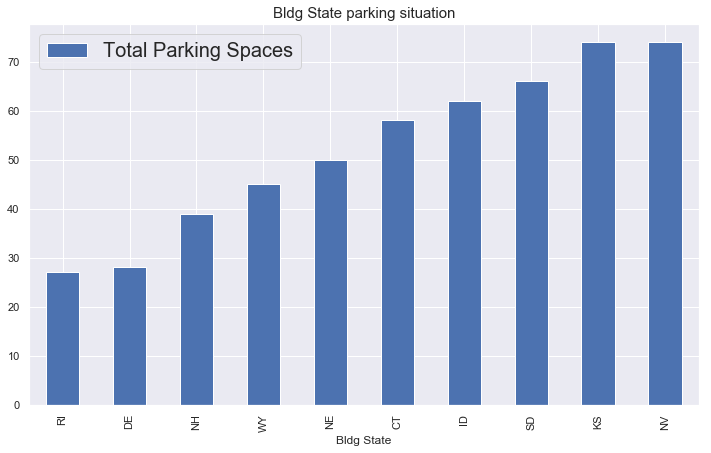

In [41]:
sns.set_context({'figure.figsize' : (12, 7)})
# sns.set_style('darkgrid')

# plt.plot(kind = 'bar', x = excess_parking.index, y = excess_parking.values )

top_10_state.plot(kind = 'bar')
plt.title('Bldg State parking situation', fontsize =15)

# # rcParams['figure.figsize'] = 11.7,8.27
plt.show()

### 6. 'States' with more 'Leased'.

In [42]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [43]:
state_leased_parking = pd.pivot_table(parking[parking['Owned/Leased'] == 'LEASED'], index='Bldg State', values='Total Parking Spaces' )
state_leased_parking.sort_values(by='Total Parking Spaces', ascending = False, inplace=True)
state_leased_parking.head(10)

,Total Parking Spaces
Bldg State,
MO,107.762821
TX,73.457086
VA,72.476316
AL,64.055556
UT,62.505882
GA,62.425414
CO,58.647727
VT,56.128205
NM,51.926316


### 7. Which Property Type has more 'ACTIVE' parking.

In [44]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [45]:
prop_type_active = parking[parking['Bldg Status'] == 'ACTIVE']
prop_type_active['Property Type'].value_counts()

BUILDING     8526
STRUCTURE     336
LAND          119
Name: Property Type, dtype: int64

In [46]:
more_active_tbl = pd.pivot_table(prop_type_active, index='Property Type', values='Total Parking Spaces', aggfunc='count')
more_active_tbl

,Total Parking Spaces
Property Type,
BUILDING,8526
LAND,119
STRUCTURE,336


In [47]:
more_active_tbl.index
more_active_tbl.values

array([[8526],
       [ 119],
       [ 336]], dtype=int64)

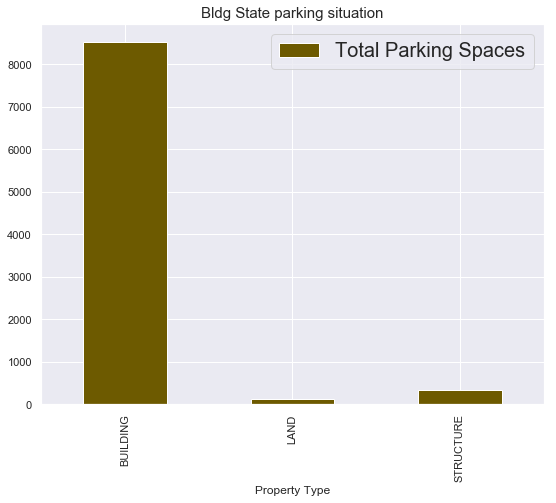

In [48]:
sns.set_context({'figure.figsize' : (9, 7)})

more_active_tbl.plot(kind = 'bar', color = '#6D5A00')
plt.title('Bldg State parking situation', fontsize =15)
plt.show()